In [2]:
import os
import gzip

In [3]:
from src.downloader import download_dataset
download_dataset("mnist", "../datasets/mnist")

/home/rzimmerdev/conda/envs/data/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
f = gzip.open("../datasets/mnist/" + os.listdir("../datasets/mnist/")[0], 'r')
f.read(16)

b'\x00\x00\x08\x03\x00\x00\xea`\x00\x00\x00\x1c\x00\x00\x00\x1c'

In [5]:
import numpy as np
from torch.utils.data import DataLoader, Dataset

In [6]:
class DatasetMNIST(Dataset):
    def __init__(self, images, labels):
        with gzip.open(images, 'r') as f:
            f.read(4)
            self.total = int.from_bytes(f.read(4), 'big')
            rows = int.from_bytes(f.read(4), 'big')
            columns = int.from_bytes(f.read(4), 'big')

            image_data = f.read()
            images = np.frombuffer(image_data, dtype=np.uint8)\
                .reshape((self.total, rows, columns))
            self.images = images
        with gzip.open(labels, 'r') as f:
            f.read(4)
            total = int.from_bytes(f.read(4), 'big')

            label_data = f.read()
            labels = np.frombuffer(label_data, dtype=np.uint8)
            self.labels = labels
        self.data = list(zip(self.images, self.labels))
    def __getitem__(self, n):
        if n > self.total:
            raise ValueError(f"Dataset doesn't have enough elements to suffice request of {n} elements.")
        return self.data[n]

    def __len__(self):
        return len(self.data)

In [7]:
dataset_dir = "../datasets/mnist/"
loader = DatasetMNIST(dataset_dir + "train_images", dataset_dir + "train_labels")

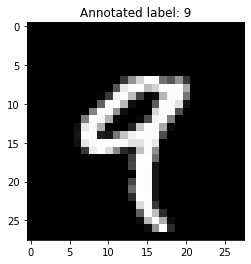

In [8]:
import matplotlib.pyplot as plt
X, y = loader[4]
plt.imshow(X, cmap="gray")
plt.title(label="Annotated label: " + str(y))
plt.show()